In [4]:
using JLD
using PyPlot
using Statistics, StatsBase
using Clustering

In [5]:
nombrecm="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_prepro-CM.jld"
archivo=load(nombrecm)
DatosCMP=archivo["CMP"]
DatosCMN=archivo["CMN"];
evocada=false
nmax=length(DatosCMP)

2000

In [6]:
# Datos ordenados 4dimensionalmente.
# vamos a usar masa maxima y tiempo maximo normalizados a 64 (dist max.)
# para hacer un hipercubo platonico y hacer el apiñonamiento jerárquico ahi.

fruncio=Array{Float64}(undef, 0,4)

for k in keys(DatosCMP)
    dat=DatosCMP[k]
    (alto, ancho)=size(dat)
    auxt=ones(alto).*k
    afafa=hcat(dat, auxt)
    fruncio=vcat(fruncio,afafa)
end

In [7]:
masamax=maximum(fruncio[:,3])

12329.550282478333

In [8]:
nmax=maximum(fruncio[:,4])

2000.0

In [9]:
xx=fruncio[:,1]
yy=fruncio[:,2]
gordis=fruncio[:,3]
nn=fruncio[:,4];

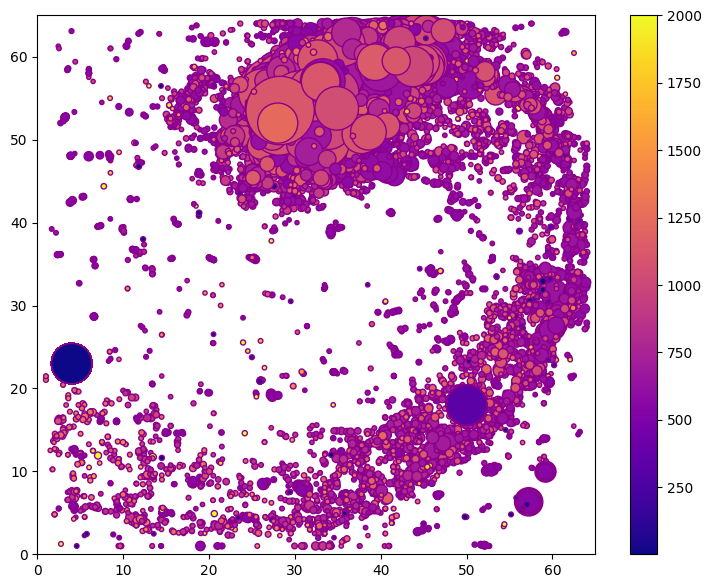

PyObject <matplotlib.colorbar.Colorbar object at 0x7f63085889b0>

In [10]:
figure(figsize=(9,7))
#axis("equal")
xlim(0.0,65.0)
ylim(0.0,65.0)
scatter(xx,yy, s=0.25*gordis, edgecolors="darkmagenta", c=nn, cmap="plasma")
colorbar()

In [11]:
# clust1=fruncio[:,1:2];
clust1=permutedims(fruncio)

4×9840 Array{Float64,2}:
   49.9978    31.7893    11.5064  …    20.5514    44.7566    49.9984
   18.0004    60.9192     3.4862       50.0248    54.6292    17.9983
 3355.89      82.6364    43.3552       42.9205    85.3075  3345.59  
  306.0     1316.0     1316.0        1241.0     1241.0      322.0   

In [12]:
function normalizar1(xx::Array)
    norma=maximum(abs.(xx))
    result=xx./norma
    return result
end

normalizar1 (generic function with 1 method)

In [13]:
clust1[3,:]=normalizar1(clust1[3,:]).*64
clust1[4,:]=normalizar1(clust1[4,:]).*64

9840-element Array{Float64,1}:
  9.792
 42.112
 42.112
 42.112
 42.656
 42.656
 42.656
 36.192
 36.192
 36.192
 36.192
 36.192
 36.192
  ⋮    
 33.344
 49.12 
 39.712
 39.712
 39.712
 39.712
 39.712
 39.712
 39.712
 39.712
 39.712
 10.304

In [14]:
using Distances

In [15]:
clustspaciotiempo=vcat(clust1[1:2,:], transpose(clust1[4,:]))

3×9840 Array{Float64,2}:
 49.9978  31.7893  11.5064  10.2865   …  28.0012  20.5514  44.7566  49.9984
 18.0004  60.9192   3.4862   7.00301     51.9968  50.0248  54.6292  17.9983
  9.792   42.112   42.112   42.112       39.712   39.712   39.712   10.304 

In [16]:
dd4d=pairwise(Euclidean(), clust1);

┌ Warning: implicit `dims=2` argument now has to be passed explicitly to specify that distances between columns should be computed
│   caller = ip:0x0
└ @ Core :-1


In [19]:
dd3d=pairwise(Euclidean(), clustspaciotiempo);
dd2d=pairwise(Euclidean(), clust1[1:2,:]);

In [20]:
clust1[4,:]

9840-element Array{Float64,1}:
  9.792
 42.112
 42.112
 42.112
 42.656
 42.656
 42.656
 36.192
 36.192
 36.192
 36.192
 36.192
 36.192
  ⋮    
 33.344
 49.12 
 39.712
 39.712
 39.712
 39.712
 39.712
 39.712
 39.712
 39.712
 39.712
 10.304

In [21]:
h4d=hclust(dd4d)
h3d=hclust(dd3d)
h2d=hclust(dd2d)

Hclust{Float64}([-2003 -3558; -3451 -7162; … ; 6946 9837; 3995 9838], [9.36836e-6, 1.08421e-5, 2.18722e-5, 2.27687e-5, 2.388e-5, 2.38943e-5, 2.3937e-5, 2.90832e-5, 3.26346e-5, 3.26485e-5  …  3.40739, 3.41606, 3.45495, 3.46857, 3.54287, 3.78235, 3.85123, 3.90964, 4.18934, 4.28125], [2105, 7583, 2328, 1641, 5591, 409, 7571, 5578, 1622, 2316  …  3964, 1363, 8160, 3987, 1636, 2976, 2117, 425, 2356, 7606], :single)

In [158]:
nivel=1000
hcorta=1.5
clust4d=cutree(h4d,h=hcorta)
clust3d=cutree(h3d,h=hcorta)
clust2d=cutree(h2d,h=hcorta);

In [159]:
unique(clust4d)

1725-element Array{Int64,1}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
 1714
 1715
 1716
 1717
 1718
 1719
 1720
 1721
 1722
 1723
 1724
 1725

### 

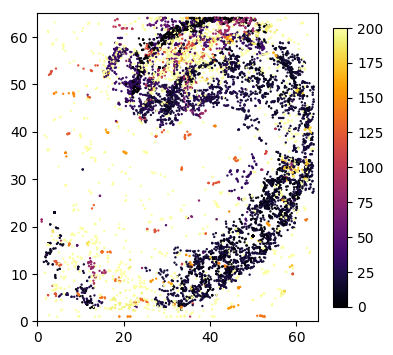

PyObject <matplotlib.colorbar.Colorbar object at 0x7f62c54b4e80>

In [131]:
fafa=figure(figsize=(4,4))
#axis("equal")

xlim(0.0,65.0)
ylim(0.0,65.0)
scatter(xx,yy, s=0.5, c=clust4d, cmap="inferno", vmin=0, vmax=200)
colorbar(fraction=0.045)

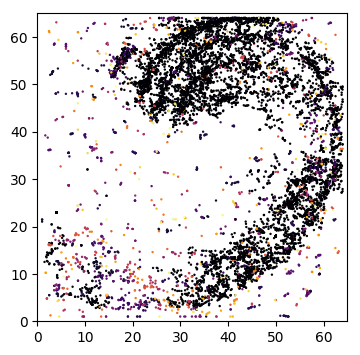

PyObject <matplotlib.collections.PathCollection object at 0x7f62c5429a58>

In [132]:
fafa=figure(figsize=(4,4))
#axis("equal")
#ax = fafa.add_subplot(111, projection="3d")
xlim(0.0,65.0)
ylim(0.0,65.0)
scatter(xx,yy, s=0.5, c=clust3d, cmap="inferno")
#colorbar(fraction=0.045)

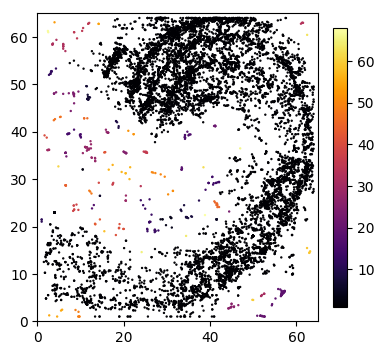

PyObject <matplotlib.colorbar.Colorbar object at 0x7f62c53b6518>

In [133]:
fafa=figure(figsize=(4,4))
#axis("equal")

xlim(0.0,65.0)
ylim(0.0,65.0)
scatter(xx,yy, s=0.5, c=clust2d, cmap="inferno")
colorbar(fraction=0.045)

In [134]:
function filtraclusterchicos(puntos, clustree, umbral)
    tabla=hcat(puntos,clustree)
    valores=unique(clustree)
    dd=Dict([(i,count(x->x==i,clustree)) for i in valores])
    predicado(j)=dd[j]>umbral
    result=tabla[map(x->predicado(x), clustree),:]
    clusterfuck=maximum(values(dd))
    println("el cluster mayor tiene ",clusterfuck, " elementos")
    return result
end

filtraclusterchicos (generic function with 1 method)

In [166]:
u=20
blabla=filtraclusterchicos(fruncio, clust4d, 16)
blublu=blabla[:,5]
size(blabla)

el cluster mayor tiene 432 elementos


(4967, 5)

In [167]:
unique(blublu)
#unique(clust4d)

74-element Array{Float64,1}:
   1.0
   2.0
   3.0
   5.0
   6.0
   7.0
   9.0
  11.0
  13.0
  14.0
  15.0
  19.0
  23.0
   ⋮  
 353.0
 364.0
 377.0
 381.0
 387.0
 390.0
 395.0
 397.0
 419.0
 422.0
 477.0
 541.0

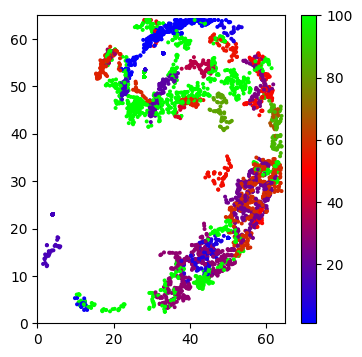

PyObject <matplotlib.colorbar.Colorbar object at 0x7f62c4c3ba58>

In [169]:
fafa=figure(figsize=(4,4))
#axis("equal")

xlim(0.0,65.0)
ylim(0.0,65.0)
scatter(blabla[:,1], blabla[:,2], c=blublu, s=3.5, cmap="brg", vmax=100)
colorbar()

In [174]:
function declustaset(puntosyclust::Array)
    result=Dict{Int,Array}()
    clustnames=unique(puntosyclust[:,5])
    for q in clustnames
        subt=puntosyclust[puntosyclust[:,5].==q,:]
        punt=round.(Int64,subt[:,1:2])
        qindez=round(Int64,q)
        result[qindez]=punt
    end
    return result
end

declustaset (generic function with 1 method)

In [176]:
decl=declustaset(blabla)

Dict{Int64,Array} with 74 entries:
  377 => [11 5; 12 5; … ; 15 4; 12 4]
  2   => [32 61; 39 64; … ; 32 61; 25 56]
  11  => [39 9; 38 13; … ; 40 9; 38 13]
  25  => [58 47; 60 50; … ; 59 49; 55 55]
  66  => [63 43; 62 44; … ; 63 44; 62 44]
  29  => [33 8; 47 11; … ; 43 13; 37 12]
  58  => [25 49; 27 49; … ; 26 49; 26 50]
  131 => [28 52; 28 52; … ; 28 52; 28 52]
  144 => [31 46; 33 46; … ; 33 47; 31 44]
  59  => [62 32; 54 17; … ; 60 28; 54 16]
  155 => [40 50; 37 49; … ; 41 49; 38 48]
  296 => [30 63; 29 64; … ; 30 63; 29 64]
  323 => [48 60; 49 60; … ; 49 60; 49 60]
  477 => [18 54; 19 55; … ; 18 56; 19 57]
  176 => [58 54; 59 54; … ; 58 54; 58 54]
  57  => [17 53; 16 53; … ; 19 56; 19 56]
  14  => [4 23; 4 23; … ; 4 23; 4 23]
  31  => [20 57; 18 55; … ; 19 55; 19 56]
  106 => [59 55; 61 55; … ; 60 56; 57 55]
  52  => [61 48; 61 48; … ; 62 49; 60 49]
  310 => [36 51; 36 55; … ; 36 51; 35 52]
  165 => [28 53; 28 53; … ; 28 53; 28 53]
  26  => [52 20; 53 18; … ; 53 18; 53 16]
  166 => [

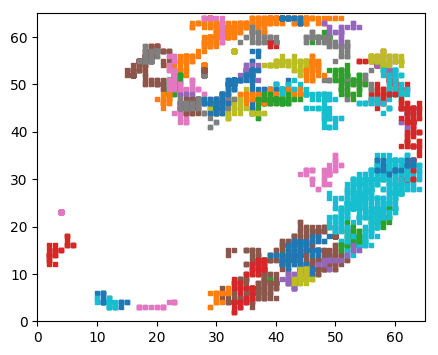

In [191]:
fafa=figure(figsize=(5,4))
#axis("equal")

xlim(0.0,65.0)
ylim(0.0,65.0)
for q in keys(decl)
    blabla=decl[q]
 scatter(blabla[:,1], blabla[:,2],s=10, marker="s")
end
#colorbar()